# Сборный проект 1

**Цель проекта**

Проанализировать информацию о продажах компьютерных игр, содержащую исторические данные о продажах, оценки пользователей и экспертов, жанры и платформы, и на основе данных выявить определяющие успешность игры закономерности, которые позволят сделать ставку на потенциально популярный продукт и правильно спланировать рекламные кампании на следующий год.


**Данные для анализа**

На анализ поступил 1 файл с с историческими данными (до 2016 года включительно) об объемах продаж игр по жанрам и игровым платформам в млн проданных копий по 4 регионам, с оценками пользователей и экспертов.

**Шаги (план) проекта**

1. Шаг 1. Обзор данных
2. Шаг 2. Подготовка данных

   2.1  Замена названий столбцов
   
   2.2  Обработка пропусков
   * Столбец name
   * Столбец genre
   * Столбец year_of_release
   * Столбец critic_score
   * Столбец user_score
   * Столбец rating
   
   2.3  Приведение данных к нужным типам
   
   2.4  Обработка дубликатов
   * Явные дубликаты
   * Неявные дубликаты
   
   2.5  Добавление столбца с суммарными продажами во всех регионах
   
   
3. Шаг 3. Исследовательский анализ данных
4. Шаг 4. Портрет пользователей регионов
5. Шаг 5. Проверка гипотез
   
   5.1  Гипотеза 1
   
   5.2  Гипотеза 2
   
   
6. Шаг 6. Общий вывод


## Шаг 1. Обзор данных

Импортируем необходимые библиотеки для работы с данными.

In [1]:
import pandas as pd # импорт библиотеки pandas
import numpy as np # импорт библиотеки numpy
import seaborn as sns # импорт библиотеки seaborn
import matplotlib.pyplot as plt # импорт библиотеки matplotlib
from scipy import stats as st # импорт библиотеки scipy

Откроем таблицу с данными, выведем первые 10 строк.

In [2]:
# чтение файла с данными и сохранение его в переменную df 

# Комментарий ревьюера
# df = pd.read_csv('C:\\Users\\bogomolova\\Desktop\\Датасет\\games.csv')
df = pd.read_csv('/datasets/games.csv')

# вывод первых 10 строк
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Изучим общую информацию о данных.

In [3]:
df.info() # получение общей информации о структуре датафрейма

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Таблица содержит 11 столбцов, 16715 строк. Наименования столбцов оформлены "змеиным стилем", но содержат заглавные буквы. Требуется переименование с переводом всех букв в нижний регистр. 

В столбцах содержатся данные двух типов:

1. 5 столбцов содержат данные типа object 
2. 6 столбцов содержат числа с плавающей запятой

На следующем шаге потребуется изменить тип данных в столбцах Year_of_Release, NA_sales, EU_sales, JP_sales, Other_sales, User_Score.

Также потребуется обработать пропуски в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating.

<div style="border:solid blue 2px; padding: 20px"> 

**Вывод**  

Таблица открыта, данные адекватны.

Требуется предобработка данных:
    
1. переименование колонок с переводом всех букв в нижний регистр
    
2. изменение типов данных в столбцах Year_of_Release, NA_sales, EU_sales, JP_sales, Other_sales, User_Score
    
3. обработка пропусков в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating 
 
</div>

## Шаг 2. Подготовка данных

### Замена названий столбцов

Произведем переименование столбцов с заменой всех букв на строчные.

In [4]:
df.columns # вывод наименований всех столбцов

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [5]:
# перевод всех букв в нижний регистр
df.columns = df.columns.str.lower()

In [6]:
df.columns # проверка результата

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Переименование проведено успешно.

### Обработка пропусков

Оценим объем пропусков в столбцах датафрейма.

In [7]:
# расчет и вывод % пропущенных значений в каждом столбце от всего количества строк
(df.isna().mean()*100).round(2)

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         40.09
rating             40.48
dtype: float64

Обработаем пропуски.

**Столбец name**

Выведем и оценим строки с пропусками в колонке name.

In [8]:
df[df['name'].isnull()] # вывод строк с пустыми значениями в колонке

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Поскольку в этих строках отсутствует также и genre, и рейтинги, удалим их, как малоинформативные. Вероятнее всего, причина их появления - ошибки при выгрузке данных.

In [9]:
# удаление строк с пропущенными значениями в колонке name
df = df.dropna(subset=['name']).reset_index(drop=True)

Проверим результат.

In [10]:
df[df['name'].isnull()]  # вывод строк с пустыми значениями в колонке

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [11]:
df.info() # вывод общей информации о структуре датафрейма

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Строки удалены.

**Столбец genre**

Выведем и оценим строки с пропусками в колонке genre.

In [12]:
df[df['genre'].isnull()] # вывод строк с пустыми значениями в колонке

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Строки с пустыми значениями в genre отсутствуют, т.к. были удалены при удалении пропусков в колонке name выше.

**Столбец year_of_release**

Выведем и оценим строки с пропусками в колонке year_of_release.

In [13]:
df[df['year_of_release'].isnull()] # вывод строк с пустыми значениями в колонке

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропусков много, вероятная причина их появления - ошибка при загрузке данных. Попробуем отсортировать данные по колонкам name и year_of_release и посмотрим на одну из групп с пропуском (данные по игре Madden NFL 2004), чтобы определить способ заполнения пропусков.

In [14]:
df = df.sort_values(['name', 'year_of_release']) # сортировка данных по колонкам name и year_of_release

In [15]:
# вывод информации по игре Madden NFL 2004
df[df['name'] == 'Madden NFL 2004'] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1880,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3888,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5707,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E


Из данных видно, что на три платформы из четырех игра вышла в 2003 году. Можно предположить, что на четвертую платформу игра вышла в том же году. Отсортируем датафрейм по играм и годам выхода и заполним пропуски в year_of_release первой записью из отсортированного списка.

In [16]:
# заполнение пропусков в year_of_release первым значением year_of_release из датафрейма, сгруппированного по названию игры и году выхода
df.loc[df["year_of_release"].isna(), "year_of_release"] = \
    df.loc[df["year_of_release"].isna(), "name"].map(df.groupby("name")["year_of_release"].first())

Проверим результат на той же игре, которую смотрели выше - Madden NFL 2004.

In [17]:
# вывод информации по игре Madden NFL 2004
df[df['name'] == 'Madden NFL 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1880,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3888,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5707,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E
183,Madden NFL 2004,PS2,2003.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E


Замена прошла успешно, пропуск заполнился первой записью из столбца year_of_release.

Проверим, сколько пустых строк в year_of_release осталось после заполнения пропусков первой записью в сгруппированных списках.

In [19]:
df[df['year_of_release'].isnull()] # вывод строк с пустыми значениями в колонке

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
11091,Action Man-Operation Extreme,PS,NaN,Action,0.05,0.03,0.00,0.01,NaN,NaN,NaN
3288,Advance Wars: Days of Ruin,DS,NaN,Strategy,0.43,0.12,0.00,0.05,86.0,8.7,E10+
1505,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN
16346,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
2105,Air-Sea Battle,2600,NaN,Shooter,0.91,0.06,0.00,0.01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7331,Yu Yu Hakusho: Dark Tournament,PS2,NaN,Fighting,0.10,0.08,0.00,0.03,56.0,8.5,T
15555,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,0.00,0.00,0.02,0.00,NaN,NaN,NaN
11432,Zero: Tsukihami no Kamen,Wii,NaN,Action,0.00,0.00,0.08,0.00,NaN,NaN,NaN
8883,eJay Clubworld,PS2,NaN,Misc,0.07,0.06,0.00,0.02,69.0,8.6,E


Количество пропусков сократилось на 100 строк, но по-прежнему существенно.

Попробуем найти еще какие-либо закономерности для заполнения пропусков. Посмотрим, сколько пропусков осталось по каждой игре.

In [20]:
# построение свода по оставшимся строкам с пропусками в year_of_release
no_year = df[df['year_of_release'].isnull()].pivot_table(index='name', values='genre',aggfunc='count')
no_year

,genre
name,
Action Man-Operation Extreme,1
Advance Wars: Days of Ruin,1
Adventure,1
Agarest Senki: Re-appearance,1
Air-Sea Battle,1
...,...
Yu Yu Hakusho: Dark Tournament,1
Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),1
Zero: Tsukihami no Kamen,1


Очевидно, что игры с одним пропуском уникальны в датафрейме, иначе в итерации выше пропуски были бы заполнены первым значением в группе при сортировке по названию. Эти пропуски мы заполнить не можем, поэтому эти строки нужно удалить, как неинформативные.

Проверим, почему остались пропуски в играх, название которых встречается в датафрейме более 1 раза.

In [21]:
# вывод списка игр с пропусками в year_of_release, названия которых встречаются в дф более 1 раза
no_year.query('genre > 1') 

,genre
name,
All-Star Baseball 2005,2
Backbreaker,2
Combat Elite: WWII Paratroopers,2
Port Royale 3,2
Robert Ludlum's The Bourne Conspiracy,2
Rock Band,4
Silent Hill: Homecoming,2
Test Drive Unlimited 2,3
The Daring Game for Girls,2


Выведем информацию по игре, встречающейся в датафрейме 4 раза.

In [22]:
df[df['name'] == 'Rock Band'] # вывод иинформации по игре Rock Band

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T
804,Rock Band,Wii,NaN,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T
1141,Rock Band,PS3,NaN,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T
1839,Rock Band,PS2,NaN,Misc,0.71,0.06,0.0,0.35,82.0,6.8,T


Поскольку год выпуска не заполнен ни по одной из платформ, все строки в year_of_release остались пустыми после обработки. У нас нет информации для заполнения этих пропусков, поэтому удалим их из анализа.

Удалим оставшиеся строки с пропусками в year_of_release.

In [23]:
# удаление оставшихся строк с пропущенными значениями в колонке year_of_release
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)

Проверим результат.

In [24]:
df.info() # вывод общей информации о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В year_of_release не осталось строк с пропусками, 146 строк удалены.

**Столбец critic_score**

Проверим, какие значения встречаются в столбце critic_score.

In [25]:
# вывод уникальных значений столбца critic_score
df['critic_score'].unique()

array([nan, 71., 75., 76., 70., 51., 65., 54., 61., 38., 46., 41., 63.,
       79., 52., 73., 78., 82., 83., 69., 74., 62., 39., 55., 77., 59.,
       56., 64., 72., 47., 50., 45., 35., 60., 80., 53., 66., 48., 30.,
       33., 68., 42., 49., 89., 84., 92., 90., 58., 57., 67., 81., 85.,
       88., 36., 43., 86., 87., 44., 27., 31., 19., 37., 26., 40., 91.,
       34., 96., 94., 25., 29., 93., 32., 23., 20., 28., 24., 95., 97.,
       98., 17., 13., 21.])

Значения адекватные, находятся в диапазоне 20-98. Вероятная причина пропусков - ошибка выгрузки данных либо отсутствие оценки игры критиками (например, если игра не проходила проверку у критиков). Поскольку пропусков много (более 50% от выборки), удаление строк с пропусками нежелательно. Заполним строки с пропусками в critic_score фиктивными значениями, чтобы они не мешали анализу и могли быть легко из него исключены при необходимости.

In [26]:
# заполнение оставшихся пропусков в critic_score фиктивным значением 999
df['critic_score'] = df['critic_score'].fillna(999)

Проверим результат.

In [27]:
# вывод общей информации по датафрейму
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     16567 non-null  float64
 9   user_score       9934 non-null   object 
 10  rating           9868 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Пропусков в колонке critic_score не осталось.

**Столбец user_score**

Проверим, какие значения встречаются в столбце critic_score.

In [28]:
# вывод уникальных значений столбца critic_score
df['user_score'].unique()

array([nan, '7.9', '8.5', '8.9', '8.7', '4.6', '7.1', '6.6', '7.5', 'tbd',
       '6.3', '6.7', '3.2', '6.2', '6', '5.8', '8.3', '5.7', '6.8', '8',
       '6.9', '5.6', '9', '7.7', '7.8', '8.1', '7.4', '4.3', '4.4', '8.2',
       '4.9', '7.2', '6.4', '5.9', '5.2', '4', '5.3', '1.1', '4.2', '8.4',
       '9.1', '9.4', '6.5', '3', '7', '6.1', '7.3', '5.5', '3.8', '3.6',
       '3.5', '7.6', '9.2', '5.4', '4.8', '4.5', '5.1', '8.8', '2.8', '2',
       '3.7', '2.5', '5', '2.7', '3.1', '1.3', '8.6', '4.1', '1.7', '4.7',
       '3.4', '1.4', '2.1', '0.3', '1.5', '9.6', '2.2', '9.7', '2.4',
       '1.8', '2.6', '3.3', '0.5', '9.5', '1.9', '9.3', '0.9', '2.9',
       '3.9', '1.6', '1', '2.3', '0.6', '0.7', '0.2', '1.2', '0'],
      dtype=object)

Значения адекватные, находятся в диапазоне 0-9,7. Помимо пропусков, в колонке critic_score есть значения 'tbd', которые будут мешать нам при изменении типа данных. Вероятная причина пропусков - ошибка выгрузки данных либо отсутствие оценки игры пользователями (например, если игра не проходила проверку у пользователей). Поскольку пропусков много (более 40% от выборки), удаление строк с пропусками нежелательно. Заполним строки с пропусками в critic_score фиктивными значениями, чтобы они не мешали анализу и могли быть легко из него исключены при необходимости.

In [29]:
# сортировка датафрейма по названию игры и оценке критиков
df = df.sort_values(['name', 'user_score'])

Посмотрим, как выглядит срез со значениями 'tbd' и пропусками в critic_score.

In [30]:
# вывод среза со значениями 'tbd' в critic_score
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
22,007: Quantum of Solace,DS,2008.0,Action,0.11,0.01,0.0,0.01,65.0,tbd,T
29,10 Minute Solution,Wii,2010.0,Sports,0.06,0.01,0.0,0.01,999.0,tbd,E
34,1001 Touch Games,DS,2011.0,Action,0.11,0.16,0.0,0.04,999.0,tbd,E
35,101-in-1 Explosive Megamix,DS,2008.0,Puzzle,0.05,0.12,0.0,0.02,46.0,tbd,E
37,101-in-1 Sports Megamix,DS,2010.0,Sports,0.08,0.00,0.0,0.01,999.0,tbd,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16560,thinkSMART,DS,2010.0,Misc,0.09,0.00,0.0,0.01,999.0,tbd,E
16561,thinkSMART FAMILY!,Wii,2010.0,Misc,0.03,0.00,0.0,0.00,999.0,tbd,E
16562,thinkSMART: Chess for Kids,DS,2011.0,Misc,0.01,0.00,0.0,0.00,999.0,tbd,E
16563,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E


In [31]:
# вывод строк с пропусками в critic_score
df[df['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Beyblade Burst,3DS,2016.0,Role-Playing,0.00,0.00,0.03,0.00,999.0,NaN,NaN
1,Fire Emblem Fates,3DS,2015.0,Role-Playing,0.81,0.23,0.52,0.11,999.0,NaN,NaN
2,Frozen: Olaf's Quest,3DS,2013.0,Platform,0.27,0.27,0.00,0.05,999.0,NaN,NaN
3,Frozen: Olaf's Quest,DS,2013.0,Platform,0.21,0.26,0.00,0.04,999.0,NaN,NaN
4,Haikyu!! Cross Team Match!,3DS,2016.0,Adventure,0.00,0.00,0.04,0.00,999.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16540,ef - a fairy tale of the two.,PS2,2010.0,Adventure,0.00,0.00,0.01,0.00,999.0,NaN,NaN
16541,everGirl,GBA,2005.0,Adventure,0.05,0.02,0.00,0.00,999.0,NaN,NaN
16558,pro evolution soccer 2011,PC,2010.0,Sports,0.00,0.05,0.00,0.01,79.0,NaN,NaN
16559,th!nk Logic Trainer,Wii,2009.0,Puzzle,0.01,0.00,0.00,0.00,999.0,NaN,NaN


Заполним строки с пропусками в user_score фиктивными значениями, чтобы они не мешали анализу и могли быть легко из него исключены при необходимости.

In [32]:
# заполнение оставшихся пропусков в user_score фиктивным значением 999
df['user_score'] = df['user_score'].fillna(999)

Поскольку по сути значения 'tbd' и пропуски не несут никакой информации, обработаем их аналогично, заменив на фиктивное значение 999, точно отсутствующее в изначальной выборке.

In [33]:
# замена 'tbd' числом 999
df.loc[df['user_score'] == 'tbd', 'user_score'] = 999

Проверим типы данных в колонке user_score после заполнения пропусков и tbd.

In [34]:
# проверка типа данных в user_score
df['user_score'].dtypes

dtype('O')

Исправим тип данных object на число с плавающей точкой.

In [35]:
# исправление типа данных на число с плавающей точкой
df['user_score'] = pd.to_numeric(df['user_score'])

Проверим корректность исправления.

In [36]:
# проверка типа данных в user_score
df['user_score'].dtypes

dtype('float64')

Исправление проведено корректно, тип данных изменен.

In [37]:
# проверка наличия пропусков в колонке user_score после проведенного выше заполнения
df['user_score'].isnull().sum()

0

In [38]:
# вывод общей информации по датафрейму
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16566
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     16567 non-null  float64
 9   user_score       16567 non-null  float64
 10  rating           9868 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Пропусков в колонке user_score не осталось.

**Столбец rating**

Проверим, какие значения встречаются в столбце rating.

In [39]:
# вывод уникальных значений столбца
df['rating'].unique()

array([nan, 'T', 'E', 'E10+', 'M', 'EC', 'AO', 'K-A', 'RP'], dtype=object)

Значения адекватные, вероятная причина пропусков - рейтинг ESRB используется в Северной Америке, при этом игра была выпущена для другой страныи и по данному рейтингу не оценивалась. Поскольку пропусков много (более 40% от выборки), удаление строк с пропусками нежелательно. Заполним строки с пропусками в rating пометкой no info, чтобы они не мешали анализу и могли быть легко из него исключены при необходимости.

In [40]:
# заполнение строк с пропусками пометкой no info
df['rating'] = df['rating'].fillna('no info')

Проверим результат проведенной замены.

In [41]:
# вывод количества оставшихся строк с пропусками в rating
df['rating'].isnull().sum()

0

Пропусков не осталось.

### Приведение данных к нужным типам

Исправим типы данных для удобства работы с ними.

Заменим тип данных в колонке year_of_release на число.

In [42]:
# замена типа данных на число
df['year_of_release'] = df['year_of_release'].astype('int')

Заменим все типы данных float64 на float32 и int64 на int32 для экономии памяти.

In [43]:
# замена типа данных float64 на float32
df[df.select_dtypes(np.float64).columns] = df.select_dtypes(np.float64).astype(np.float32)

In [44]:
# замена типа данных int64 на int32
df[df.select_dtypes(np.int64).columns] = df.select_dtypes(np.int64).astype(np.int32)

Оценим корректность и результат осуществленных замен.

In [45]:
# вывод общей информации по датафрейму
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16566
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int32  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float32
 5   eu_sales         16567 non-null  float32
 6   jp_sales         16567 non-null  float32
 7   other_sales      16567 non-null  float32
 8   critic_score     16567 non-null  float32
 9   user_score       16567 non-null  float32
 10  rating           16567 non-null  object 
dtypes: float32(6), int32(1), object(4)
memory usage: 1.1+ MB


In [46]:
# вывод первых 5 строк датафрейма
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Beyblade Burst,3DS,2016,Role-Playing,0.00,0.00,0.03,0.00,999.0,999.0,no info
1,Fire Emblem Fates,3DS,2015,Role-Playing,0.81,0.23,0.52,0.11,999.0,999.0,no info
2,Frozen: Olaf's Quest,3DS,2013,Platform,0.27,0.27,0.00,0.05,999.0,999.0,no info
3,Frozen: Olaf's Quest,DS,2013,Platform,0.21,0.26,0.00,0.04,999.0,999.0,no info
4,Haikyu!! Cross Team Match!,3DS,2016,Adventure,0.00,0.00,0.04,0.00,999.0,999.0,no info


Замены типов данных осуществлены корректно.

### Обработка дубликатов

Проверим данные на наличие дубликатов: явных и неявных.

**Явные дубликаты**

In [47]:
# подстчет строк - явных дубликатов
df.duplicated().sum()

0

Явных дубликатов в датафрейме нет.

**Неявные дубликаты**

Проверим данные на наличие неявных дубликатов в каждой из колонок.

In [48]:
# вывод уникальных значений столбца name
df['name'].value_counts()

Need for Speed: Most Wanted                               12
FIFA 14                                                    9
Ratatouille                                                9
Madden NFL 07                                              9
LEGO Marvel Super Heroes                                   9
                                                          ..
Desert Strike Advance                                      1
Death Trap                                                 1
The King of Fighters Kyo                                   1
Pirates of the Caribbean: The Curse of the Black Pearl     1
Virtua Fighter                                             1
Name: name, Length: 11426, dtype: int64

Из-за большого количества значений визуальная проверка не представляется возможной; в реальной жизни, вероятно, нужно будет анализировать названия по фрагментам для поиска вхождения.

In [49]:
# вывод уникальных значений столбца platform
df['platform'].value_counts()

PS2     2140
DS      2129
PS3     1320
Wii     1301
X360    1250
PSP     1203
PS      1190
PC       970
XB       817
GBA      813
GC       552
3DS      515
PSV      429
PS4      392
N64      318
XOne     247
SNES     239
SAT      173
WiiU     147
2600     117
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

Очевидных дубликатов нет; в реальной жизни потребуется погружаться в предмет и изучать, как могут называться игровые платформы, для определения и замены синонимов.

In [50]:
# вывод уникальных значений столбца platform
df['genre'].value_counts()

Action          3342
Sports          2333
Misc            1735
Role-Playing    1484
Shooter         1311
Adventure       1294
Racing          1236
Platform         879
Simulation       860
Fighting         842
Strategy         678
Puzzle           573
Name: genre, dtype: int64

Дублей нет.

Остальные колонки мы изучили выше в процессе обработки пропусков, поэтому дополнительно работу по поиску дублей в них проводить не будем.

### Добавление столбца с суммарными продажами во всех регионах

Добавим в датафрейм колонку с данными о суммарных продажах по всем регионам по каждой строке с игрой.

In [51]:
# добавление колонки с данными о суммарных продажах в датафрейм после колонок с продажами по регионам
df.insert(8, "total_sales", (df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']))

Проверим результат.

In [52]:
# вывод первых 5 строк датафрейма
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Beyblade Burst,3DS,2016,Role-Playing,0.00,0.00,0.03,0.00,0.03,999.0,999.0,no info
1,Fire Emblem Fates,3DS,2015,Role-Playing,0.81,0.23,0.52,0.11,1.67,999.0,999.0,no info
2,Frozen: Olaf's Quest,3DS,2013,Platform,0.27,0.27,0.00,0.05,0.59,999.0,999.0,no info
3,Frozen: Olaf's Quest,DS,2013,Platform,0.21,0.26,0.00,0.04,0.51,999.0,999.0,no info
4,Haikyu!! Cross Team Match!,3DS,2016,Adventure,0.00,0.00,0.04,0.00,0.04,999.0,999.0,no info


<div style="border:solid blue 2px; padding: 20px"> 

**Вывод**  

Проведена подготовка данных:
    
1. проведена замена названий столбцов с изменением регистра на нижний
2. обработаны и заменены/удалены пропуски в колонках: 
 * name
 * genre
 * year_of_release
 * critic_score
 * user_score
 * rating
 
   Оставшееся количество строк для анализа - 16567
    
3. произведена замена типов данных 
 * в колонке year_of_release на int32
 * во всех колонках с float64 - на float32
4. проведена проверка на дубликаты, дубликатов нет
5. добавлена колонка с суммарными продажами по всем регионам

Данные подготовлены к проведению анализа.
 
 
</div>

## Шаг 3. Исследовательский анализ данных

Оценим, **какое количество игр выпускалось в разные годы**, чтобы определить, данные за какой период взять для анализа.

In [54]:
# группировка датафрейма по году выпуска и подсчет количества игр, выпущенных в этот год
df.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      42
1992      43
1993      60
1994     122
1995     219
1996     263
1997     290
1998     379
1999     339
2000     351
2001     486
2002     845
2003     783
2004     764
2005     948
2006    1018
2007    1202
2008    1441
2009    1430
2010    1269
2011    1153
2012     662
2013     548
2014     581
2015     606
2016     502
Name: name, dtype: int64

По сгруппированным данным выше видно, что до 1994 года количество выпущенных в год игр составляло менее 100, далее до 2006 оно росло на 100-300 позиций в год и увеличилось до 1000 в год, и в период 2006-2011 выходило уже более 1000 игр в год (до 1500 игр), но с 2012 года это количество сократилось вдвое (до 600-500 игр в год). Данная тенденция сохраняется по 2016 год включительно. Вероятно, ее причина - переход игр в онлайн формат, а также рост объемов продаж "облачных" копий, не требующих приобретения физического носителя. 

С учетом данной тенденции, а также общей тенденции к быстрой смене трендов, особенно в сфере цифровых технологий, для прогноза логичным будет взять максимально приближенные к моменту прогнозирования данные - с 2012 года по 2016 год.

Оценим, **как менялись продажи по платформам**. Определим платформы с наибольшими суммарными продажами и построим по ним распределение по годам. Оценим, за какой характерный срок появляются новые и исчезают старые платформы.

Для этого построим сводную таблицу по суммарным продажам по платформам за все годы.

In [55]:
(df.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')).round()

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
2600,11.0,36.0,29.0,6.0,0.0,0.0,1.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,63.0,52.0,57.0,44.0,28.0,15.0
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,147.0,145.0,120.0,85.0,26.0,12.0,2.0,NaN,NaN,NaN
GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Выберем **наиболее популярные платформы с наибольшим количеством суммарных продаж**, для чего построим сводную таблицу по суммарным продажам по платформам.

In [56]:
# формирование сводной таблицы по суммарным продажам по платформам
platform_sales = (df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)).round()
platform_sales

platform
PS2     1247.0
X360     967.0
PS3      935.0
Wii      903.0
DS       804.0
PS       728.0
PS4      314.0
GBA      314.0
PSP      294.0
PC       259.0
3DS      259.0
XB       257.0
GB       254.0
NES      251.0
N64      218.0
SNES     200.0
GC       199.0
XOne     159.0
2600      89.0
WiiU      82.0
PSV       54.0
SAT       34.0
GEN       28.0
DC        16.0
SCD        2.0
NG         1.0
WS         1.0
TG16       0.0
3DO        0.0
GG         0.0
PCFX       0.0
Name: total_sales, dtype: float32

Сформируем **список наиболее продаваемых платформ** с суммарными продажами более 500 млн копий.

In [57]:
# формирование списка самых популярных платформ
platform_list = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

Сделаем срез данных по этим платформам.

In [58]:
# формирование среза данных
platform_sales_years = df.query('platform in @platform_list')
platform_sales_years

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
3,Frozen: Olaf's Quest,DS,2013,Platform,0.21,0.26,0.00,0.04,0.51,999.0,999.0,no info
5,Tales of Xillia 2,PS3,2012,Role-Playing,0.20,0.12,0.45,0.07,0.84,71.0,7.9,T
6,'98 Koshien,PS,1998,Sports,0.15,0.10,0.12,0.03,0.40,999.0,999.0,no info
7,.hack//G.U. Vol.1//Rebirth,PS2,2006,Role-Playing,0.00,0.00,0.17,0.00,0.17,999.0,999.0,no info
8,.hack//G.U. Vol.2//Reminisce,PS2,2006,Role-Playing,0.11,0.09,0.00,0.03,0.23,999.0,999.0,no info
...,...,...,...,...,...,...,...,...,...,...,...,...
16562,thinkSMART: Chess for Kids,DS,2011,Misc,0.01,0.00,0.00,0.00,0.01,999.0,999.0,E
16563,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,2.42,71.0,999.0,E
16565,uDraw Studio: Instant Artist,X360,2011,Misc,0.01,0.01,0.00,0.00,0.02,54.0,5.7,E
16564,uDraw Studio: Instant Artist,Wii,2011,Misc,0.06,0.09,0.00,0.02,0.17,999.0,999.0,E


Сгруппируем данные по этим платформам по годам по суммарным продажам.

In [59]:
# формирование сводной таблицы по платформам по годам (суммарные продажи)
platform_sales_years_pivot = (platform_sales_years.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')).round()
platform_sales_years_pivot

year_of_release,1985,1991,1994,1995,1996,1997,1998,1999,2000,2001,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
DS,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,147.0,145.0,120.0,85.0,26.0,12.0,2.0,NaN,NaN,NaN
PS,NaN,NaN,6.0,36.0,95.0,136.0,169.0,145.0,96.0,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PS2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,39.0,166.0,...,76.0,54.0,26.0,6.0,0.0,NaN,NaN,NaN,NaN,NaN
PS3,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.0,119.0,131.0,143.0,158.0,108.0,113.0,48.0,17.0,4.0
Wii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,153.0,178.0,207.0,129.0,60.0,23.0,9.0,4.0,1.0,0.0
X360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95.0,136.0,121.0,171.0,145.0,101.0,89.0,35.0,12.0,2.0


Построим **диаграммы для визуализации процесса появления и исчезновения платформ**.

Подготовим список названий колонок с годами для построения диаграмм.

In [60]:
# формирование списка с годами
years = list(platform_sales_years_pivot.columns.values)

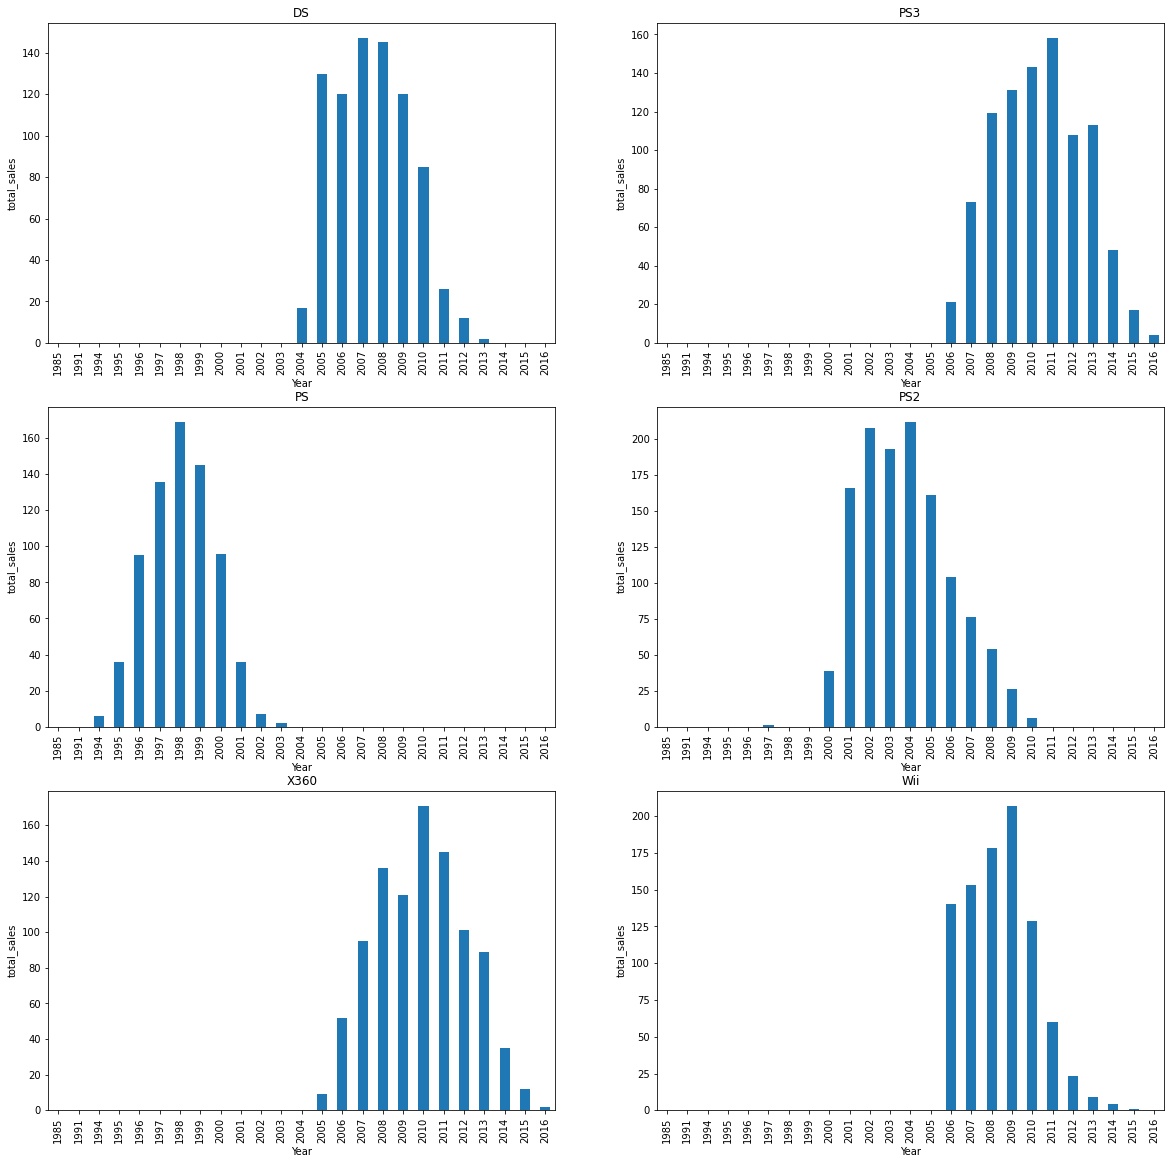

In [61]:
# построение диаграмм по выбранным 6 платформам с наибольшим количеством суммарных продаж
plt.figure(figsize=(20, 20))
for i, platform in enumerate(platform_sales_years['platform'].unique()):
    plt.subplot(3, 2, i + 1)
    platform_sales_years_pivot.loc[platform, years].plot(kind='bar')
    plt.title(platform)
    plt.xlabel('Year')
    plt.ylabel('total_sales')

На основании данных диаграмм можно сделать вывод о том, что платформы существуют 10-11 лет, 2-3 года набирают популярность, 2-4 года находятся на пике популярности и в течение 3-4 лет теряют популярность и уходят с рынка.

Продолжим анализ на данных актуального периода. В качестве актуального периода возьмем данные, максимально приближенные к моменту прогнозирования - данные за 2012-2016 годы.

In [62]:
# формирование среза данных за 2012-2016 годы
df_2012_2016 = df.query('year_of_release > 2011')
df_2012_2016

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Beyblade Burst,3DS,2016,Role-Playing,0.00,0.00,0.03,0.00,0.03,999.0,999.0,no info
1,Fire Emblem Fates,3DS,2015,Role-Playing,0.81,0.23,0.52,0.11,1.67,999.0,999.0,no info
2,Frozen: Olaf's Quest,3DS,2013,Platform,0.27,0.27,0.00,0.05,0.59,999.0,999.0,no info
3,Frozen: Olaf's Quest,DS,2013,Platform,0.21,0.26,0.00,0.04,0.51,999.0,999.0,no info
4,Haikyu!! Cross Team Match!,3DS,2016,Adventure,0.00,0.00,0.04,0.00,0.04,999.0,999.0,no info
...,...,...,...,...,...,...,...,...,...,...,...,...
16531,[Prototype 2],PC,2012,Action,0.07,0.03,0.00,0.01,0.11,76.0,6.4,M
16530,[Prototype 2],PS3,2012,Action,0.36,0.28,0.00,0.10,0.74,79.0,6.8,M
16529,[Prototype 2],X360,2012,Action,0.48,0.24,0.00,0.07,0.79,74.0,7.0,M
16543,htoL#NiQ: The Firefly Diary,PSV,2014,Platform,0.00,0.00,0.01,0.00,0.01,58.0,7.7,T


Определим, **какие платформы в периоде 2012-2016 лидируют по продажам**, растут или падают. Выберем несколько потенциально прибыльных платформ.

In [63]:
# формирование сводной табилцы по суммарным продажам по платформам за период 2012-2016 годы
platform_sales_2012_2016 = (df_2012_2016.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')).round()
platform_sales_2012_2016

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,52.0,57.0,44.0,28.0,15.0
DS,12.0,2.0,NaN,NaN,NaN
PC,23.0,13.0,13.0,9.0,5.0
PS3,108.0,113.0,48.0,17.0,4.0
PS4,NaN,26.0,100.0,119.0,69.0
PSP,8.0,3.0,0.0,0.0,NaN
PSV,16.0,11.0,12.0,6.0,4.0
Wii,23.0,9.0,4.0,1.0,0.0
WiiU,18.0,22.0,22.0,16.0,5.0


Как видно из данных сводной таблицы, все платформы в период 2012-2016 демонстрируют снижение объемов продаж. Наиболее привлекательно в разрезе объемов суммарных продаж выглядят платформы 3DS, PS4, XOne.

Построим **диаграммы размаха по глобальным продажам игр в разбивке по платформам** и проанализируем результат.

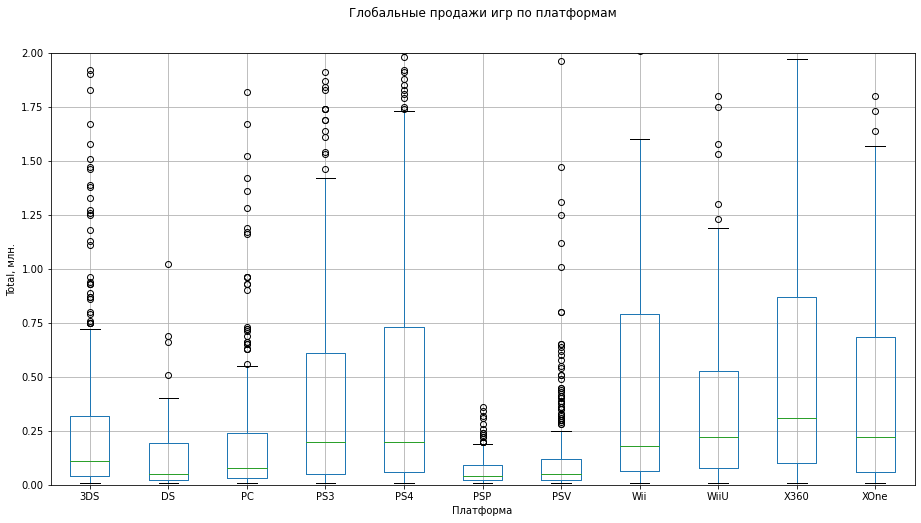

In [123]:
# построение диаграмм размаха по всем платформам с продажами в 2012-2016 годах
df_2012_2016.boxplot('total_sales', by='platform', figsize=(15, 8))
plt.suptitle('Глобальные продажи игр по платформам')
plt.title(None)
plt.xlabel('Платформа'), plt.ylabel('Total, млн.')
plt.ylim(0, 2)
plt.show()

**3DS**: медиана на уровне ` 0,13 млн, длинный хвост выбросов в диапазоне 0,75 - 1,9 млн

**DS**: медиана на уровне ` 0,05 млн, небольшой хвост выбросов в диапазоне 0,5 - 1,0 млн

**PC**: медиана на уровне ` 0,07 млн, длинный хвост выбросов в диапазоне 0,55 - 1,8 млн

**PS3**: медиана на уровне ` 0,2 млн, длинный хвост выбросов в диапазоне 1,4 - 1,8 млн

**PS4**: медиана на уровне ` 0,2 млн, длинный хвост выбросов в диапазоне 1,7 - 2,0 млн

**PSP**: медиана на уровне ` 0,04 млн, небольшой хвост выбросов в диапазоне 0,19 - 0,4 млн

**PSV**: медиана на уровне ` 0,045 млн, длинный хвост выбросов в диапазоне 0,27 - 1,4 млн

**Wii**: медиана на уровне ` 0,19 млн, выбросов практически нет

**WiiU**: медиана на уровне ` 0,23 млн, небольшой хвост выбросов в диапазоне 1,2 - 1,8 млн

**X360**: медиана на уровне ` 0,3 млн, выбросов практически нет

**XOne**: медиана на уровне ` 0,23 млн, небольшой хвост выбросов в диапазоне 1,6 - 1,8 млн

Оценим **влияние на продажи отзывов пользователей и критиков на примере пяти популярных платформ**. Построим точечные диаграммы и посчитаем корреляцию между отзывами и продажами.

Для этого сформируем срезы данных по платформам PS4, XOne, 3DS, PC и WiiU без учета фиктивных значений critic_score и user_score, которыми мы заполняли пропуски.

**Платформа PS4**

Оценим взаимосвязь critic_score и total_sales.

In [65]:
# формирование среза данных по платформе PS4 без учета фиктивных значений critic_score
PS4_critic_score = df_2012_2016.query("platform == 'PS4' & critic_score != 999")
PS4_critic_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
109,7 Days to Die,PS4,2016,Action,0.04,0.08,0.00,0.02,0.14,45.0,5.9,M
243,Aegis of Earth: Protonovus Assault,PS4,2016,Action,0.02,0.00,0.00,0.00,0.02,57.0,7.8,T
256,Agatha Christie's The ABC Murders,PS4,2016,Adventure,0.01,0.01,0.00,0.00,0.02,67.0,6.2,T
343,Alien: Isolation,PS4,2014,Shooter,0.34,0.57,0.04,0.17,1.12,79.0,8.1,M
463,Angry Birds Star Wars,PS4,2013,Strategy,0.10,0.08,0.00,0.04,0.22,47.0,2.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...
16143,World of Final Fantasy,PS4,2016,Role-Playing,0.08,0.14,0.08,0.04,0.34,77.0,8.3,E10+
16189,Worms: WMD,PS4,2016,Action,0.01,0.02,0.00,0.00,0.03,78.0,7.6,E10+
16250,XCOM 2,PS4,2016,Strategy,0.04,0.08,0.00,0.02,0.14,88.0,8.0,T
16491,Zombie Army Trilogy,PS4,2015,Shooter,0.05,0.12,0.00,0.03,0.20,62.0,6.8,no info


In [66]:
# Комментарий ревьюера
print(len(df_2012_2016.query("platform == 'PS4' & critic_score != 999 & user_score != 999")))
print(len(df_2012_2016.query("platform == 'PS4' & critic_score != 999")))
print(len(df_2012_2016.query("platform == 'PS4' & user_score != 999")))

249
252
257


In [67]:
# выбор колонок с данными total_sales и critic_score для анализа
PS4_critic_corr = PS4_critic_score[['total_sales', 'critic_score']]
PS4_critic_corr.head()

,total_sales,critic_score
109,0.14,45.0
243,0.02,57.0
256,0.02,67.0
343,1.12,79.0
463,0.22,47.0


Посчитаем коэффициент корреляции.

In [68]:
# расчет коэффициента корреляции
PS4_critic_corr.corr().round(2)

,total_sales,critic_score
total_sales,1.00,0.41
critic_score,0.41,1.00


Получившуюся зависимость визуализируем на графике с помощью точечной диаграммы.

Text(0.5, 1.0, 'PS4_total_sales_critic_score')

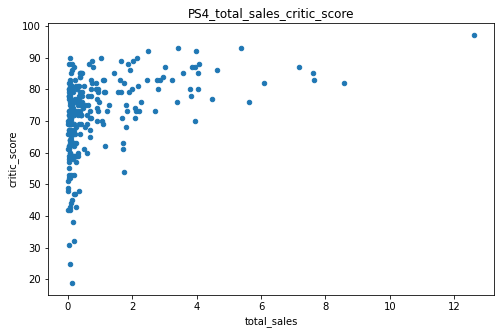

In [69]:
PS4_critic_corr.plot(x='total_sales', y='critic_score', kind='scatter', figsize=(8, 5))
plt.title('PS4_total_sales_critic_score')

Оценим взаимосвязь user_score и total_sales.

In [70]:
# формирование среза данных по платформе PS4 без учета фиктивных значений user_score
PS4_user_score = df_2012_2016.query("platform == 'PS4' & user_score != 999")
PS4_user_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
109,7 Days to Die,PS4,2016,Action,0.04,0.08,0.00,0.02,0.14,45.0,5.9,M
243,Aegis of Earth: Protonovus Assault,PS4,2016,Action,0.02,0.00,0.00,0.00,0.02,57.0,7.8,T
256,Agatha Christie's The ABC Murders,PS4,2016,Adventure,0.01,0.01,0.00,0.00,0.02,67.0,6.2,T
343,Alien: Isolation,PS4,2014,Shooter,0.34,0.57,0.04,0.17,1.12,79.0,8.1,M
463,Angry Birds Star Wars,PS4,2013,Strategy,0.10,0.08,0.00,0.04,0.22,47.0,2.0,E
...,...,...,...,...,...,...,...,...,...,...,...,...
16143,World of Final Fantasy,PS4,2016,Role-Playing,0.08,0.14,0.08,0.04,0.34,77.0,8.3,E10+
16189,Worms: WMD,PS4,2016,Action,0.01,0.02,0.00,0.00,0.03,78.0,7.6,E10+
16250,XCOM 2,PS4,2016,Strategy,0.04,0.08,0.00,0.02,0.14,88.0,8.0,T
16491,Zombie Army Trilogy,PS4,2015,Shooter,0.05,0.12,0.00,0.03,0.20,62.0,6.8,no info


In [71]:
# выбор колонок с данными total_sales и user_score для анализа
PS4_user_corr = PS4_user_score[['total_sales', 'user_score']]
PS4_user_corr.head()

,total_sales,user_score
109,0.14,5.9
243,0.02,7.8
256,0.02,6.2
343,1.12,8.1
463,0.22,2.0


Посчитаем коэффициент корреляции.

In [72]:
# расчет коэффициента корреляции
PS4_user_corr.corr().round(2)

,total_sales,user_score
total_sales,1.00,-0.03
user_score,-0.03,1.00


Получившуюся зависимость визуализируем на графике с помощью точечной диаграммы.

Text(0.5, 1.0, 'PS4_total_sales_user_score')

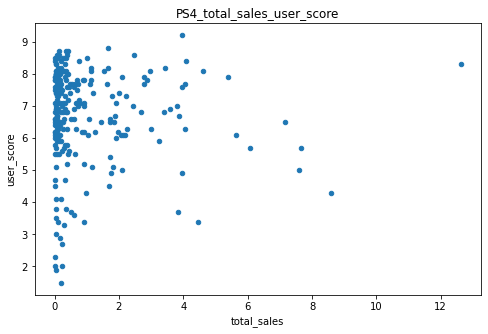

In [73]:
PS4_user_corr.plot(x='total_sales', y='user_score', kind='scatter', figsize=(8, 5))
plt.title('PS4_total_sales_user_score')

Таким образом, на основании изучения данных выше взаимосвязь оценок и объемов продаж описать следующим образом:

* связаны прямо пропорционально (рост одного вызывает рост другого), связь существенная положительная: оценки критиков и суммарные продажи
* связаны обратно пропорционально (рост одного вызывает снижение другого), связь слабая отрицательная: оценки пользователей и суммарные продажи

Вторая взаимосвязь выглядит нелогичной, вероятно, имеет место некоторая предвзятость пользователей, проводивших оценку игр. Если бы игра не соответсвовала ожиданиям пользователей, ее продажи бы не росли.

Проверим полученные выводы на данных по популярным платформам **XOne, 3DS, PC, WiiU**.

Оценим взаимосвязь critic_score и total_sales.

In [74]:
# формирование среза данных по платформам без учета фиктивных значений critic_score
pop_platform_list = ['XOne', '3DS', 'PC', 'WiiU']
pop_platform_critic_score = df_2012_2016.query("platform in @pop_platform_list & critic_score != 999")
pop_platform_critic_score.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
110,7 Days to Die,XOne,2016,Action,0.03,0.02,0.00,0.0,0.05,35.0,5.2,M
120,7th Dragon III Code: VFD,3DS,2015,Role-Playing,0.04,0.00,0.12,0.0,0.16,77.0,8.2,T
138,A-Train: City Simulator,3DS,2014,Simulation,0.00,0.00,0.06,0.0,0.06,65.0,999.0,E10+
203,Act of Aggression,PC,2015,Strategy,0.00,0.01,0.00,0.0,0.01,71.0,7.1,no info
236,Adventure Time: The Secret of the Nameless Kin...,3DS,2014,Action,0.00,0.07,0.00,0.0,0.07,65.0,5.6,E10+


In [75]:
# создание функции для расчета корреляции и построения точечной диаграммы по каждой платформе
def platform_critic_corr(platform):
    platform_data = pop_platform_critic_score[(pop_platform_critic_score['platform'] == platform)]
    platform_critic_corr = platform_data[['total_sales', 'critic_score']]
    display(platform_critic_corr.corr().round(2))
    platform_critic_corr.plot(x='total_sales', y='critic_score', kind='scatter', figsize=(8, 5))
    plt.title(f'{platform}_total_sales_critic_score')

,total_sales,critic_score
total_sales,1.00,0.42
critic_score,0.42,1.00


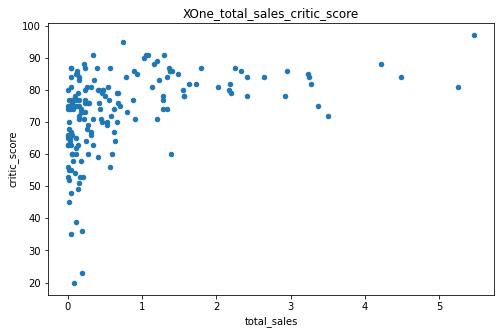

In [76]:
# расчет корреляции и построениt точечной диаграммы по платформе XOne
platform_critic_corr('XOne')

,total_sales,critic_score
total_sales,1.00,0.32
critic_score,0.32,1.00


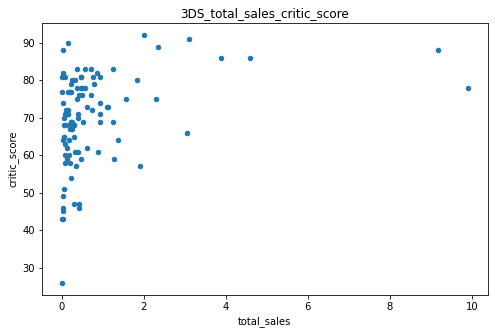

In [77]:
# расчет корреляции и построениt точечной диаграммы по платформе 3DS
platform_critic_corr('3DS')

,total_sales,critic_score
total_sales,1.00,0.24
critic_score,0.24,1.00


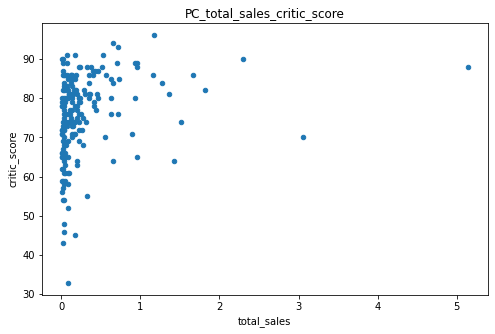

In [78]:
# расчет корреляции и построениt точечной диаграммы по платформе PC
platform_critic_corr('PC')

,total_sales,critic_score
total_sales,1.00,0.35
critic_score,0.35,1.00


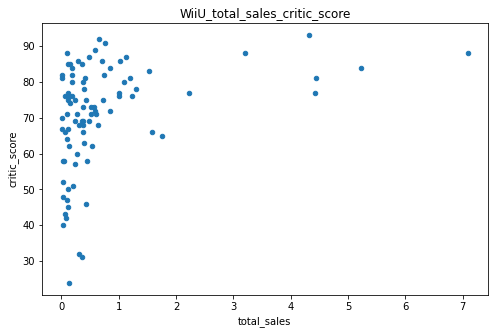

In [79]:
# расчет корреляции и построениt точечной диаграммы по платформе WiiU
platform_critic_corr('WiiU')

Оценим взаимосвязь user_score и total_sales.

In [80]:
# формирование среза данных по платформам без учета фиктивных значений user_score
pop_platform_list = ['XOne', '3DS', 'PC', 'WiiU']
pop_platform_user_score = df_2012_2016.query("platform in @pop_platform_list & user_score != 999")
pop_platform_user_score.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
110,7 Days to Die,XOne,2016,Action,0.03,0.02,0.00,0.0,0.05,35.0,5.2,M
120,7th Dragon III Code: VFD,3DS,2015,Role-Playing,0.04,0.00,0.12,0.0,0.16,77.0,8.2,T
203,Act of Aggression,PC,2015,Strategy,0.00,0.01,0.00,0.0,0.01,71.0,7.1,no info
236,Adventure Time: The Secret of the Nameless Kin...,3DS,2014,Action,0.00,0.07,0.00,0.0,0.07,65.0,5.6,E10+
257,Agatha Christie's The ABC Murders,XOne,2016,Adventure,0.01,0.00,0.00,0.0,0.01,66.0,7.5,no info


In [81]:
# создание функции для расчета корреляции и построения точечной диаграммы по каждой платформе
def platform_user_corr(platform):
    platform_data = pop_platform_user_score[(pop_platform_user_score['platform'] == platform)]
    platform_user_corr = platform_data[['total_sales', 'user_score']]
    display(platform_user_corr.corr().round(2))
    platform_user_corr.plot(x='total_sales', y='user_score', kind='scatter', figsize=(8, 5))
    plt.title(f'{platform}_total_sales_user_score')

,total_sales,user_score
total_sales,1.00,-0.07
user_score,-0.07,1.00


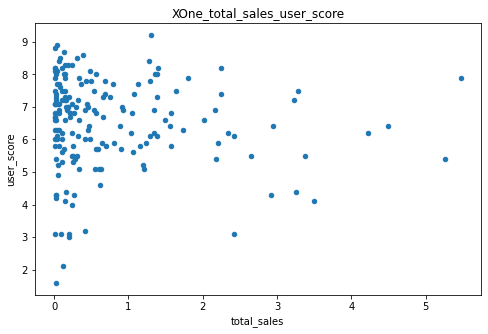

In [82]:
# расчет корреляции и построение точечной диаграммы по платформе XOne
platform_user_corr('XOne')

,total_sales,user_score
total_sales,1.0,0.2
user_score,0.2,1.0


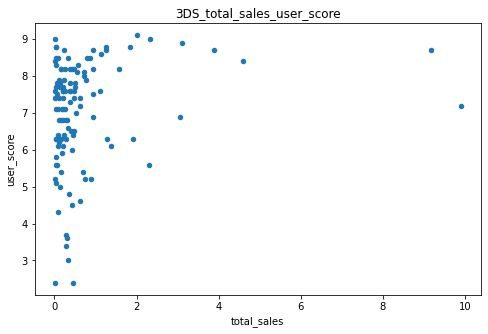

In [83]:
# расчет корреляции и построение точечной диаграммы по платформе 3DS
platform_user_corr('3DS')

,total_sales,user_score
total_sales,1.00,-0.12
user_score,-0.12,1.00


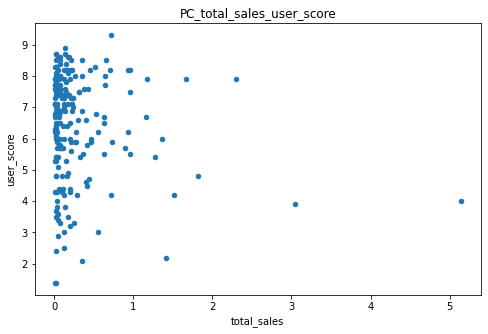

In [84]:
# расчет корреляции и построение точечной диаграммы по платформе PC
platform_user_corr('PC')

,total_sales,user_score
total_sales,1.0,0.4
user_score,0.4,1.0


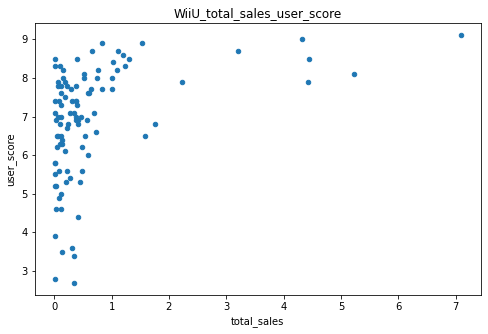

In [85]:
# расчет корреляции и построение точечной диаграммы по платформе WiiU
platform_user_corr('WiiU')

Таким образом, сделанные по данным платформы PS4 выводы подтверждаются данными по платформам XOne, 3DS, PC, WiiU: рост оценок критиков вызывает рост продаж, и наоборот. Оценки пользователей имеют различную корреляцию по разным платформам: для платформ PS4, PC, XOne корреляция отрицательная, для платформ WiiU и 3DS - положительная. 

Проанализируем **общее распределение игр по жанрам** и определим самые прибыльные жанры.

Для этого сформируем сводную таблицу по жанрам и объемам продаж по медианному и суммарному значениям.

In [86]:
# построение сводной таблицы по медиане и сумме
genre_total_sales = df_2012_2016.pivot_table(
    index='genre', 
    values='total_sales', 
    aggfunc=['median','sum']).round(2).sort_values(by=('median', 'total_sales'), ascending=False)
genre_total_sales

,median,sum
,total_sales,total_sales
genre,,
Shooter,0.43,304.750000
Sports,0.24,181.070007
Platform,0.21,61.000000
Racing,0.14,53.500000
Role-Playing,0.14,192.800003
Fighting,0.13,44.490002
Action,0.12,446.410004
Misc,0.12,85.279999


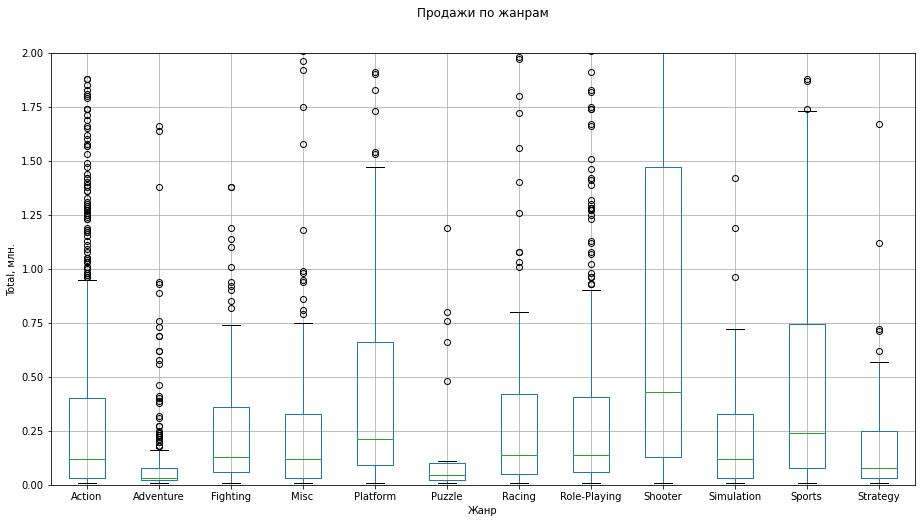

In [87]:
# построение диаграмм размаха по жанрам
df_2012_2016.boxplot('total_sales', by='genre', figsize=(15, 8))
plt.suptitle('Продажи по жанрам')
plt.title(None)
plt.xlabel('Жанр'), plt.ylabel('Total, млн.')
plt.ylim(0, 2)
plt.show()

По данным сводной таблицы с медианными значениями выше и диаграммам размаха видно, что наиболе прибыльными являются продажи игр жанров Shooter, Sports и Platform, меньше всего прибыли приносят продажи игр жанров Puzzle и Adventure.

<div style="border:solid blue 2px; padding: 20px"> 

**Вывод**  

Проведен исследовательский анализ данных:
1. проанализировано изменение количества выходивших игр по годам с 1983 по 2016, определена тенденцияна снижения числа игр в период 2012-2016 по сравнению с периодом 2006-2011 с 1400 до 600-500 игр в год
2. определены наиболее популярные платформы и временные зависимости популярности платформ (платформы существуют 10-11 лет, 2-3 года набирают популярность, 2-4 года находятся на пике популярности и в течение 3-4 лет теряют популярность и уходят с рынка)
3. выбран актуальный период для дальнейшего анализа - 2012-2016 годы (наиболее близкий к периоду планирования и поэтому учитывающий последние тенденции)
4. определены платформы - лидеры по продажам в период 2012-2016 годы (3DS, PS4, XOne наиболее привлекательны, хотя все платформы демонстрируют снижение объемов продаж в период 2012-2016)
5. данные по продажам по платформам проанализированы при помощи диаграмм размаха
6. на примере пяти популярных платформ рассчитаны и проанализированы корреляции между оценками критиков и пользователей и объемами продаж (между продажами и оценками критиков корреляция довольно сильнfя положительная, между продажами и оценками пользователей корреляция разная в зависимости от платформы: от слабой отрицательной до слабой положительной)
7. проанализирована популярность жанров - наиболее прибыльными являются продажи игр жанров Shooter, Sports и Platform, меньше всего прибыли приносят продажи игр жанров Puzzle и Adventure.
  
</div>

## Шаг 4. Портрет пользователей регионов

Определим **самые популярные платформы (топ-5) для пользователя каждого региона (NA, EU, JP)** и проанализируем различия в долях продаж.

Для этого построим сводную таблицу по объемам продаж по платформам по регионам.

**Северная Америка**

In [88]:
# построение таблицы по популярности платформ по региону Северная Америка
na_platforms = df_2012_2016.groupby('platform')['na_sales'].sum().round().sort_values(ascending=False)
na_platforms

platform
X360    141.0
PS4     109.0
PS3     104.0
XOne     93.0
3DS      55.0
WiiU     38.0
PC       19.0
Wii      18.0
PSV      11.0
DS        5.0
PSP       0.0
Name: na_sales, dtype: float32

In [89]:
# суммирование продаж по платформам без top-5
na_platforms[5:].sum()

91.0

In [90]:
# формирование Series для диаграммы
na_5 = pd.Series([141,109,104,93,55,91], index=['X360','PS4','PS3','XOne','3DS','Others'])
na_5

X360      141
PS4       109
PS3       104
XOne       93
3DS        55
Others     91
dtype: int64

**Европа**

In [91]:
# построение таблицы по популярности платформ по региону Европа
eu_platforms = df_2012_2016.groupby('platform')['eu_sales'].sum().round().sort_values(ascending=False)
eu_platforms

platform
PS4     141.0
PS3     107.0
X360     75.0
XOne     52.0
3DS      43.0
PC       38.0
WiiU     25.0
Wii      12.0
PSV      11.0
DS        4.0
PSP       1.0
Name: eu_sales, dtype: float32

In [92]:
# суммирование продаж по платформам без top-5
eu_platforms[5:].sum()

91.0

In [93]:
# формирование Series для диаграммы
eu_5 = pd.Series([141,107,75,52,43,38], index=['PS4','PS3','X360','XOne','3DS','Others'])
eu_5

PS4       141
PS3       107
X360       75
XOne       52
3DS        43
Others     38
dtype: int64

**Япония**

In [94]:
# построение таблицы по популярности платформ по региону Япония
jp_platforms = df_2012_2016.groupby('platform')['jp_sales'].sum().round().sort_values(ascending=False)
jp_platforms

platform
3DS     88.0
PS3     35.0
PSV     21.0
PS4     16.0
WiiU    13.0
PSP     11.0
DS       4.0
Wii      3.0
X360     2.0
PC       0.0
XOne     0.0
Name: jp_sales, dtype: float32

In [95]:
# суммирование продаж по платформам без top-5
jp_platforms[5:].sum()

20.0

In [96]:
# формирование Series для диаграммы
jp_5 = pd.Series([88,35,21,16,13,20], index=['3DS','PS3','PSV','PS4','WiiU','Others'])
jp_5

3DS       88
PS3       35
PSV       21
PS4       16
WiiU      13
Others    20
dtype: int64

Построим круговые диаграммы для демонстрации отличий.

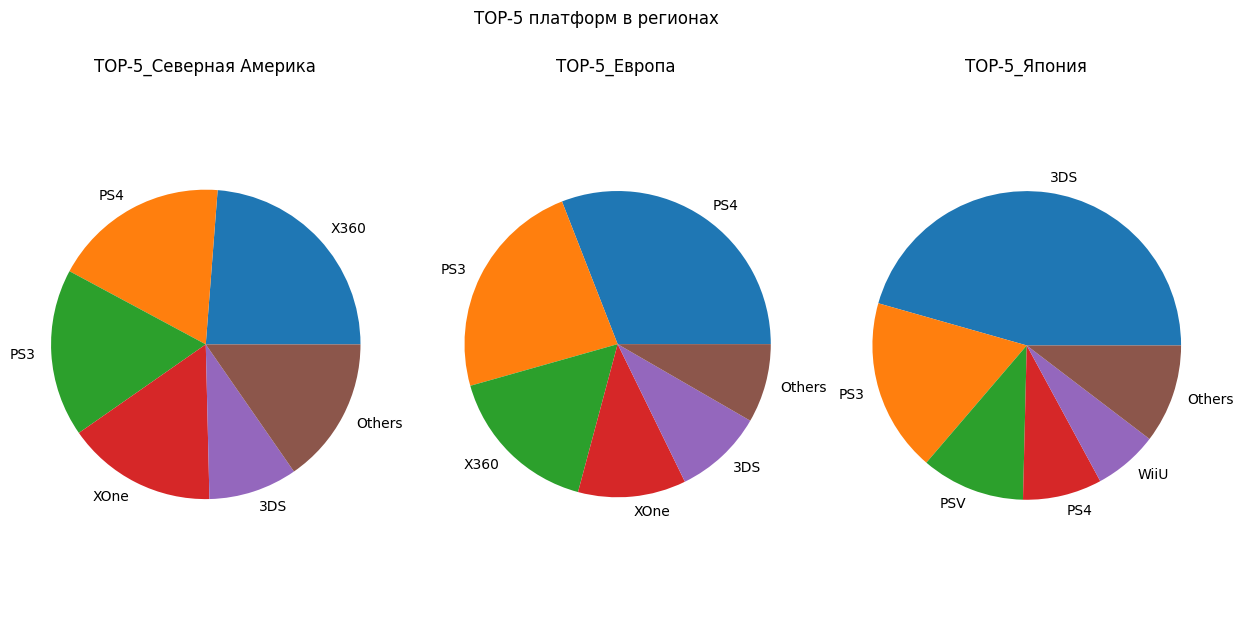

In [97]:
fig, axes = plt.subplots(1, 3, figsize=(15,7), dpi = 100)
plt.suptitle("TOP-5 платформ в регионах")

for ax, series, title in zip (axes, (na_5, eu_5, jp_5), ('TOP-5_Северная Америка', 'TOP-5_Европа', 'TOP-5_Япония')):
    ax.pie(series, labels=series.index)
    ax.axis("equal")
    ax.set_title(title)

Очевидно, что предпочтения пользователей Северной Америки и Европы схожи (наиболее популярны платформы PS4, PS3, X360, XOne), при этом препочтения пользователей Японии существенно отличаются, что может быть связано с особенностями менталитета пользователей в Японии и национальной лояльностью к японским брендам (предпочтение платформ 3DS, PS3 и PSV японского производства).

Определим **самые популярные жанры (топ-5) для пользователя каждого региона (NA, EU, JP)**.

Для этого построим сводные таблицы по продажам по жанрам по регионам.

**Северная Америка**

In [98]:
# построение таблицы по популярности жанров по региону Северная Америка
na_genres = df_2012_2016.groupby('genre')['na_sales'].sum().round().sort_values(ascending=False)
na_genres

genre
Action          180.0
Shooter         145.0
Sports           82.0
Role-Playing     64.0
Misc             38.0
Platform         25.0
Fighting         20.0
Racing           17.0
Adventure         9.0
Simulation        8.0
Strategy          4.0
Puzzle            1.0
Name: na_sales, dtype: float32

In [99]:
# суммирование продаж по жанрам без top-5
na_genres[5:].sum()

84.0

In [100]:
# формирование Series для диаграммы
na_g5 = pd.Series([180,145,82,64,38,84], index=['Action','Shooter','Sports','Role-Playing','Misc','Others'])
na_g5

Action          180
Shooter         145
Sports           82
Role-Playing     64
Misc             38
Others           84
dtype: int64

**Европа**

In [101]:
# построение таблицы по популярности жанров по региону Европа
eu_genres = df_2012_2016.groupby('genre')['eu_sales'].sum().round().sort_values(ascending=False)
eu_genres

genre
Action          162.0
Shooter         113.0
Sports           69.0
Role-Playing     49.0
Racing           27.0
Misc             26.0
Platform         21.0
Simulation       15.0
Fighting         11.0
Adventure         9.0
Strategy          5.0
Puzzle            1.0
Name: eu_sales, dtype: float32

In [102]:
# суммирование продаж по жанрам без top-5
eu_genres[5:].sum()

88.0

In [103]:
# формирование Series для диаграммы
eu_g5 = pd.Series([162,113,69,49,27,88], index=['Action','Shooter','Sports','Role-Playing','Racing','Others'])
eu_g5

Action          162
Shooter         113
Sports           69
Role-Playing     49
Racing           27
Others           88
dtype: int64

**Япония**

In [104]:
# построение таблицы по популярности жанров по региону Япония
jp_genres = df_2012_2016.groupby('genre')['jp_sales'].sum().round().sort_values(ascending=False)
jp_genres

genre
Role-Playing    65.0
Action          53.0
Misc            13.0
Simulation      10.0
Fighting         9.0
Platform         9.0
Shooter          9.0
Adventure        8.0
Sports           8.0
Strategy         3.0
Puzzle           2.0
Racing           2.0
Name: jp_sales, dtype: float32

In [105]:
# суммирование продаж по жанрам без top-5
jp_genres[5:].sum()

41.0

In [106]:
# формирование Series для диаграммы
jp_g5 = pd.Series([65,53,13,10,9,9], index=['Role-Playing','Action','Misc','Simulation','Fighting','Others'])
jp_g5

Role-Playing    65
Action          53
Misc            13
Simulation      10
Fighting         9
Others           9
dtype: int64

Построим круговые диаграммы для демонстрации отличий.

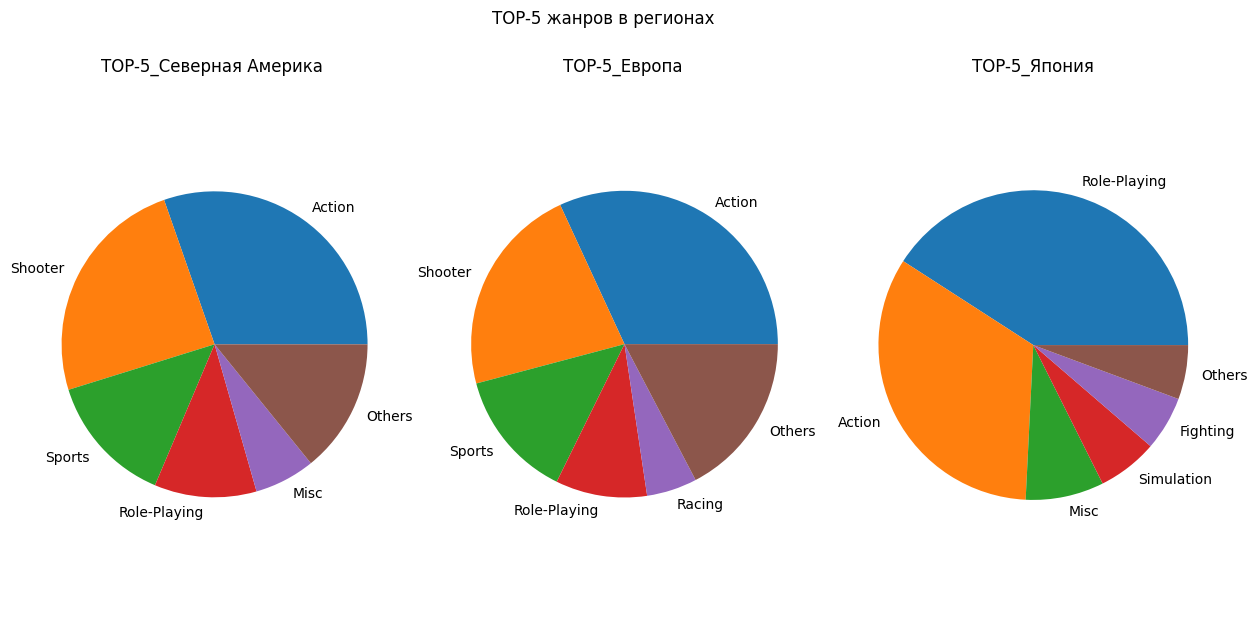

In [107]:
fig, axes = plt.subplots(1, 3, figsize=(15,7), dpi = 100)
plt.suptitle("TOP-5 жанров в регионах")

for ax, series, title in zip (axes, (na_g5, eu_g5, jp_g5), ('TOP-5_Северная Америка', 'TOP-5_Европа', 'TOP-5_Япония')):
    ax.pie(series, labels=series.index)
    ax.axis("equal")
    ax.set_title(title)

Очевидно, что предпочтения пользователей Северной Америки и Европы снова похожи (наиболее популярны жанры игр Action, Shooter, Sports), при этом препочтения пользователей Японии существенно отличаются. Данное отличие (предпочтение игр жанра Role-Playing) может быть связано с увлечением населения Японии таким особым жанром игр, как Японская ролевая игра.

Определим, **влияет ли рейтинг ESRB на продажи в отдельном регионе** для пользователя каждого региона.

Для этого построим сводные таблицы по продажам по рейтингу по регионам.

In [108]:
# построение сводной таблицы по региону Северная Америка и вывод первых 5 строк
df_2012_2016.groupby('rating')['na_sales'].sum().round().sort_values(ascending=False)

rating
M          232.0
E          114.0
no info    103.0
E10+        78.0
T           66.0
Name: na_sales, dtype: float32

Самыми популярными в Северной Америке являются игры жанров М - для взрослых и E - для всех.

In [109]:
# построение сводной таблицы по региону Европа и вывод первых 5 строк
df_2012_2016.groupby('rating')['eu_sales'].sum().round().sort_values(ascending=False)

rating
M          194.0
E          113.0
no info     92.0
E10+        57.0
T           53.0
Name: eu_sales, dtype: float32

Самыми популярными в Европе также являются игры категорий М - для взрослых и E - для всех.

In [110]:
# построение сводной таблицы по региону Япония и вывод первых 5 строк
df_2012_2016.groupby('rating')['jp_sales'].sum().round().sort_values(ascending=False)

rating
no info    109.0
E           28.0
T           26.0
M           21.0
E10+         8.0
Name: jp_sales, dtype: float32

Самыми популярными в Японии являются игры без категории ESRB, что может быть связано с наличием в Японии своей системы присвоения категорий видеоиграм.

<div style="border:solid blue 2px; padding: 20px"> 

**Вывод**  

Сформирован портрет пользователей по регионам:
1. Северная Америка и Европа: наиболее популярные платформы X360, PS4, PS3, наиболее популярные жанры Action и Shooter, наиболее продаваемые категории игр М - для взрослых и E - для всех
2. Япония: наиболее популярные платформы 3DS, PS3, PSV (предпочтение японским брендам), наиболее популярные жанры Role-Playing и Action (увлечение населения Японии таким особым жанром игр, как Японская ролевая игра), наиболее продаваемые категории игр - игры без категории ESRB, что может быть связано с наличием в Японии своей системы присвоения категорий видеоиграм.
  
</div>

## Шаг 5. Проверка гипотез

Сформулируем пары гипотез (нулевую и альтернативную) для проверки предположений:

• Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

• Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Уровень значимости (суммарная вероятность того, что измеренное эмпирически значение окажется далеко от среднего) установим на отметке 0,05. Если наблюдаемое на выборке значение попадает в эту зону (<0,05), вероятность такого события при верной нулевой гипотезе признаётся слишком малой, значит, у нас есть основание отвергнуть нулевую гипотезу. Когда значение попадает в зону «Не твергаем H₀» (>0,05), то оснований отвергать нулевую гипотезу нет. Считаем, что эмпирически полученные данные не противоречат нулевой гипотезе.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind().

Выведем датафрейм.

In [111]:
# вывод первых 5 строк датафрейма
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Beyblade Burst,3DS,2016,Role-Playing,0.00,0.00,0.03,0.00,0.03,999.0,999.0,no info
1,Fire Emblem Fates,3DS,2015,Role-Playing,0.81,0.23,0.52,0.11,1.67,999.0,999.0,no info
2,Frozen: Olaf's Quest,3DS,2013,Platform,0.27,0.27,0.00,0.05,0.59,999.0,999.0,no info
3,Frozen: Olaf's Quest,DS,2013,Platform,0.21,0.26,0.00,0.04,0.51,999.0,999.0,no info
4,Haikyu!! Cross Team Match!,3DS,2016,Adventure,0.00,0.00,0.04,0.00,0.04,999.0,999.0,no info


### Гипотеза 1

Проверим предположение:
•	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Первая пара гипотез будет звучать так:

**H₀**: Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC

**H₁**: Средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу платформы PC

Сформируем срезы по данным по платформам.

In [112]:
# формирование среза по платформе XOne без учета пропусков в user_score, заполненных фиктивными значениями
user_score_XOne = df.query("platform == 'XOne' & user_score != 999")
user_score_XOne

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
110,7 Days to Die,XOne,2016,Action,0.03,0.02,0.0,0.00,0.05,35.0,5.2,M
257,Agatha Christie's The ABC Murders,XOne,2016,Adventure,0.01,0.00,0.0,0.00,0.01,66.0,7.5,no info
344,Alien: Isolation,XOne,2014,Shooter,0.22,0.24,0.0,0.04,0.50,78.0,7.8,M
464,Angry Birds Star Wars,XOne,2013,Strategy,0.11,0.04,0.0,0.02,0.17,53.0,6.9,E
641,Arslan: The Warriors of Legend,XOne,2016,Action,0.01,0.00,0.0,0.00,0.01,999.0,5.8,T
...,...,...,...,...,...,...,...,...,...,...,...,...
16036,Wolfenstein: The Old Blood,XOne,2015,Action,0.07,0.07,0.0,0.01,0.15,75.0,8.0,no info
16190,Worms: WMD,XOne,2016,Action,0.01,0.00,0.0,0.00,0.01,75.0,8.1,E10+
16251,XCOM 2,XOne,2016,Strategy,0.02,0.02,0.0,0.00,0.04,87.0,8.1,T
16492,Zombie Army Trilogy,XOne,2015,Shooter,0.05,0.05,0.0,0.01,0.11,62.0,7.2,no info


In [113]:
# формирование среза по платформе PC без учета пропусков в user_score, заполненных фиктивными значениями
user_score_PC = df.query("platform == 'PC' & user_score != 999")
user_score_PC

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
23,007: Quantum of Solace,PC,2008,Action,0.01,0.01,0.0,0.00,0.02,70.0,6.3,T
45,15 Days,PC,2009,Adventure,0.00,0.01,0.0,0.00,0.01,63.0,5.8,no info
46,1701 A.D.,PC,2006,Simulation,0.00,0.25,0.0,0.04,0.29,79.0,8.3,E10+
49,18 Wheels of Steel: Extreme Trucker,PC,2009,Racing,0.00,0.02,0.0,0.00,0.02,999.0,8.0,no info
50,18 Wheels of Steel: Extreme Trucker 2,PC,2011,Racing,0.08,0.02,0.0,0.01,0.11,999.0,8.3,E
...,...,...,...,...,...,...,...,...,...,...,...,...
16252,XCOM: Enemy Unknown,PC,2012,Strategy,0.27,0.36,0.0,0.08,0.71,89.0,8.2,M
16507,Zoo Tycoon 2,PC,2004,Strategy,0.00,0.05,0.0,0.01,0.06,72.0,8.1,E
16509,Zoo Tycoon 2: Ultimate Collection,PC,2008,Strategy,0.04,0.18,0.0,0.04,0.26,999.0,8.4,E
16511,Zoo Tycoon: Complete Collection,PC,2003,Strategy,0.03,0.02,0.0,0.01,0.06,999.0,8.0,E


Применим метод scipy.stats.ttest_ind() для определения вероятности справедливости нулевой гипотезы.

In [114]:
# применение метода
alpha = .05
results = st.ttest_ind(
    user_score_XOne['user_score'], 
    user_score_PC['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.148767431285274e-05
Отвергаем нулевую гипотезу


Поскольку вероятность получить такие события, которые сформулированы в нулевой гипотезе, ничтожно мала (существенно меньше уровня значимости), мы вынуждены отвергнуть нулевую гипотезу.

Поскольку выборки невелики, рассчитаем средние значения и оценим справедливость нулевой гипотезы эмпирическим путем.

Рассчитаем среднее арифметическое по пользовательским оценкам по платформе XOne.

In [115]:
# расчет среднего арифметического
user_score_XOne['user_score'].mean()

6.521428

Рассчитаем среднее арифметическое по пользовательским оценкам по платформе PC.

In [116]:
# расчет среднего арифметического
user_score_PC['user_score'].mean()

7.0673633

Значения средних арифметческих отличаются на 0,5.

### Гипотеза 2

Проверим предположение: •	Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Вторая пара гипотез будет звучать так:

**H₀**: Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports

**H₁**: Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports

Сформируем срезы по данным по жанрам.

In [117]:
# формирование среза по жанру Action без учета пропусков в user_score, заполненных фиктивными значениями
user_score_Action = df.query("genre == 'Action' & user_score != 999")
user_score_Action

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
23,007: Quantum of Solace,PC,2008,Action,0.01,0.01,0.00,0.00,0.02,70.0,6.3,T
19,007: Quantum of Solace,PS3,2008,Action,0.43,0.51,0.02,0.19,1.15,65.0,6.6,T
18,007: Quantum of Solace,X360,2008,Action,0.82,0.51,0.01,0.14,1.48,65.0,7.1,T
20,007: Quantum of Solace,Wii,2008,Action,0.29,0.28,0.01,0.07,0.65,54.0,7.5,T
25,007: The World is not Enough,PS,2000,Action,0.51,0.35,0.00,0.06,0.92,61.0,6.7,T
...,...,...,...,...,...,...,...,...,...,...,...,...
16533,[Prototype],PS3,2009,Action,0.65,0.40,0.00,0.19,1.24,79.0,7.7,M
16532,[Prototype],X360,2009,Action,0.84,0.35,0.00,0.12,1.31,78.0,7.8,M
16548,inFAMOUS,PS3,2009,Action,1.76,0.68,0.12,0.37,2.93,85.0,8.3,T
16549,inFAMOUS 2,PS3,2011,Action,1.05,0.47,0.08,0.22,1.82,83.0,8.4,T


In [118]:
# формирование среза по жанру Sports без учета пропусков в user_score, заполненных фиктивными значениями
user_score_Sports = df.query("genre == 'Sports' & user_score != 999")
user_score_Sports

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
65,2002 FIFA World Cup,PS2,2002,Sports,0.21,0.17,0.16,0.06,0.60,73.0,5.6,E
67,2002 FIFA World Cup,GC,2002,Sports,0.04,0.01,0.00,0.00,0.05,78.0,7.7,E
66,2002 FIFA World Cup,XB,2002,Sports,0.14,0.04,0.00,0.01,0.19,79.0,9.0,E
71,2010 FIFA World Cup South Africa,Wii,2010,Sports,0.23,0.15,0.01,0.04,0.43,70.0,6.7,E
70,2010 FIFA World Cup South Africa,PSP,2010,Sports,0.09,0.22,0.03,0.12,0.46,69.0,7.4,E
...,...,...,...,...,...,...,...,...,...,...,...,...
16557,pro evolution soccer 2011,Wii,2010,Sports,0.07,0.10,0.03,0.02,0.22,78.0,5.4,E
16554,pro evolution soccer 2011,PSP,2010,Sports,0.05,0.30,0.29,0.16,0.80,74.0,5.8,E
16555,pro evolution soccer 2011,X360,2010,Sports,0.09,0.44,0.00,0.07,0.60,79.0,5.9,E
16556,pro evolution soccer 2011,PS2,2010,Sports,0.04,0.21,0.05,0.11,0.41,999.0,6.7,E


Применим метод scipy.stats.ttest_ind() для определения вероятности справедливости нулевой гипотезы.

In [119]:
# применение метода
alpha = .05
results = st.ttest_ind(
    user_score_Action['user_score'], 
    user_score_Sports['user_score'])

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.08026082266757677
Не получилось отвергнуть нулевую гипотезу


Поскольку вероятность получить такие события, которые сформулированы в нулевой гипотезе, велика (выше уровня значимости), мы не можем отвергнуть нулевую гипотезу.

Поскольку выборки невелики, рассчитаем средние значения и оценим справедливость нулевой гипотезы эмпирическим путем.

Рассчитаем среднее арифметическое по пользовательским оценкам по жанру Action.

In [120]:
# расчет среднего арифметического
user_score_Action['user_score'].mean()

7.0564833

Рассчитаем среднее арифметическое по пользовательским оценкам по жанру Sports.

In [121]:
# расчет среднего арифметического
user_score_Sports['user_score'].mean()

6.9563746

Значения средних арифметческих действительно чрезвычайно близки.

<div style="border:solid blue 2px; padding: 20px"> 

**Вывод**  

Для проверки предположений о наличии различий между средними пользовательскими рейтингами платформ Xbox One и PC и средними пользовательскими рейтингами жанров Action и Sports были сформулированы две пары гипотез:
    
H₀: Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC

H₁: Средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу платформы PC

H₀: Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports

H₁: Средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports

Для их проверки был применен метод scipy.stats.ttest_ind() при уровне значимости 0,05, в результате чего в первой паре нулевая гипотеза была отвергнута, а во второй паре гипотез нулевая гипотеза не была отвергнута.
  
</div>

## Шаг 6. Общий вывод

<div style="border:solid blue 2px; padding: 20px"> 

**Общий вывод**  

Целью данного исследования было проанализировать информацию о продажах видеоигр и на основе данных выявить определяющие успешность игры закономерности, которые позволят правильно спланировать рекламные кампании на следующий период.

Для достижения цели были проделаны следующие работы:
    
Шаг 1. Проведен обзор данных
    
Открыта таблица с данными, определены необходимые исправления: 
1. переименование колонок с переводом всех букв в нижний регистр
2. изменение типов данных в столбцах Year_of_Release, NA_sales, EU_sales, JP_sales, Other_sales, User_Score
3. обработка пропусков в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating
    
Шаг 2. Осуществлена предобработка данных
    
1. замена названий столбцов с изменением регистра на нижний
2. обработка пропусков в ряде колонок, в результате чего датафрейм сократился, и на анализ поступило 16567 строк
3. изменение типов данных на int32 и float32
4. проверка данных на наличие дубликатов
5. добавление в датафрейм нового столбца с суммарными продажми по регионам
    
Шаг 3. Проведен исследовательский анализ данных
    
1. анализ изменения количества выходивших игр по годам с 1983 по 2016 (выявлено снижение количества игр за последние 10 лет с 1400 до 600-500 игр в год)
2. определение наиболее популярные платформы и сроки существования платформ (в среднем, 10-11 лет суммарно)
3. анализ данных наиболее актуального периода 2012-2016 годы
4. определение платформы - лидеры по продажам в период 2012-2016 годы (3DS, PS4, XOne)
5. анализ корреляции между оценками критиков и пользователей и объемами продаж (между продажами и оценками критиков коррекляция положительная, между продажами и оценками пользователей корреляция различается в зависимости от платформы от слабой отрицательной до слабой положительной)
6. анализ популярности жанров - наибольшую прибыль приносят продажи игр жанров Shooter, Sports и Platform, меньше всего прибыли приносят продажи игр жанров Puzzle и Adventure
    
Шаг 4. Составлен портрет пользователей регионов
    
1. Пользователи в Северной Америке и Европе имеют схожие предпочтения: наиболее популярны платформы X360, PS4, PS3, наиболее популярны жанры Action и Shooter, наиболее продаваемы категории игр М - для взрослых и E - для всех
2. Пользователи в Японии отличаются в своих предпочтениях: наиболее популярны платформы 3DS, PS3, PSV, наиболее популярны жанры Role-Playing и Action, наиболее продаваемы игры без категории ESRB
    
Шаг 5. Осуществлена проверка гипотез
    
Из двух сформированных пар гипотез нулевая гипотеза первой пары была отвергнута (Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы PC), нулевая гипотеза второй пары не была отвергута (Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports).
 
*Таким образом, в следующем 2017 году необходимо активировать рекламу для игр для взрослых (категория М) на платформах X360, PS4, PS3 в жанрах Action и Shooter для Северной Америки и Европы и на платформе 3DS в жанре Role-Playing для Японии. При выборе игры следует ориентироваться на оценки критиков, а также учитывать общую тенденцию на снижение продаж игр для платформ.*
  
</div>